<a href="https://colab.research.google.com/github/AntoninaRemizova/ML/blob/main/ML_class_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек и подготовка данных

Датасет содержит данные 5110 пациентов, собранные для исследования различных факторов, потенциально связанных с риском инсульта. Размер датасета: 5110 х 12. Параметры:

* `id` - Уникальный идентификатор пациента;
* `gender` - Пол пациента;
* `age` - Возраст пациента;
*	`hypertension` - Наличие гипертонии;
* `heart_disease`	- Наличие сердечно-сосудистых заболеваний;
* `ever_married` - Состоял ли пациент в браке;
* `work_type` - Тип занятости;
* `Residence_type` - Вид места жительства;
* `avg_glucose_level` - Средний уровень глюкозы в крови;
* `bmi` - Индекс массы тела;
* `smoking_status` - Статус курения;
* `stroke` - Был ли у пациента инсульт.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/AntoninaRemizova/ML/refs/heads/main/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.shape

(5110, 12)

#Подготовка датасета

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Проверим на пропуски

In [ ]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
df.dropna(inplace=True)
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
df.shape

(4909, 12)

## Проверим записи на уникальность

In [ ]:
df['id'].nunique()

4909

## Удалим столбец, который не несет информации

In [ ]:
df.drop(columns='id', inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Приведем показатель возраста к целочисленным значениям

In [ ]:
df.age=df.age.astype('int32')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Разделим параметры на категориальные и числовые

In [ ]:
categ = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']
num = ['age', 'avg_glucose_level', 'bmi']

## Частота категорий в категориальных признаках

In [ ]:
for col in categ:
    print(df[col].value_counts().to_string())
    print("")

gender
Female    2897
Male      2011
Other        1

ever_married
Yes    3204
No     1705

work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22

Residence_type
Urban    2490
Rural    2419

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737

hypertension
0    4458
1     451

heart_disease
0    4666
1     243

stroke
0    4700
1     209



# Графики

In [ ]:
colors = sns.color_palette('Set1')

## Линейная диаграмма и точечный график

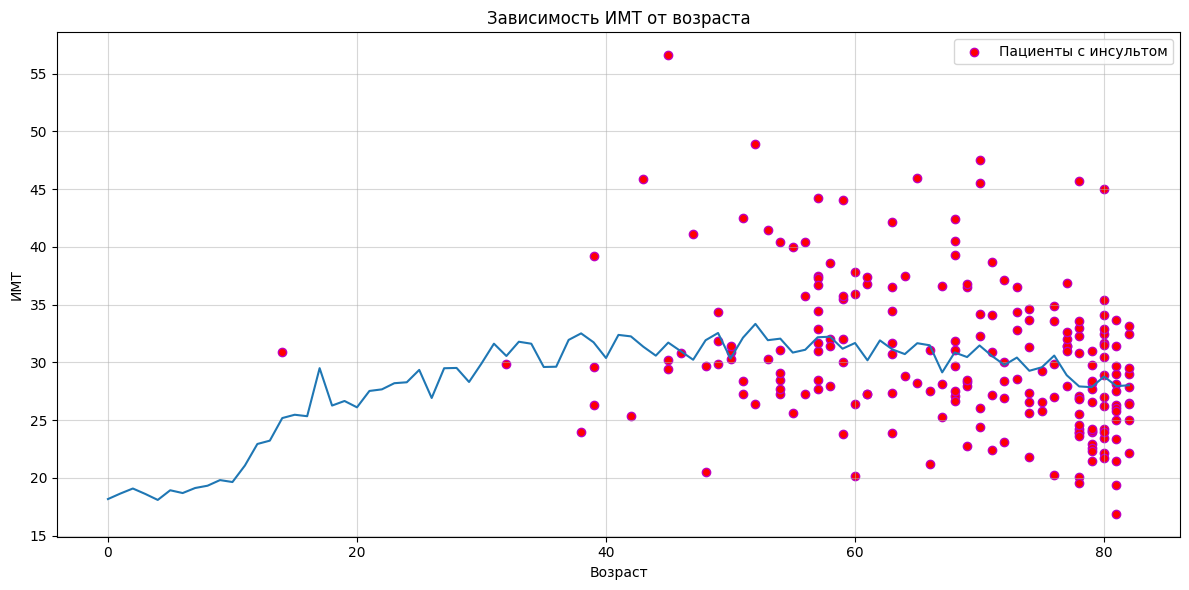

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df,
                 y='bmi',
                 x='age',
                 errorbar=None)

stroke_data = df[df['stroke'] == 1]
plt.scatter(stroke_data['age'],
            stroke_data['bmi'],
            color='r',
            edgecolors='m',
            label='Пациенты с инсультом')

ax.set_xlabel("Возраст")
ax.set_ylabel("ИМТ")
plt.grid(True, alpha=0.5)
plt.title('Зависимость ИМТ от возраста')
plt.legend()
plt.tight_layout()
plt.show()

## Столбчатая диаграмма

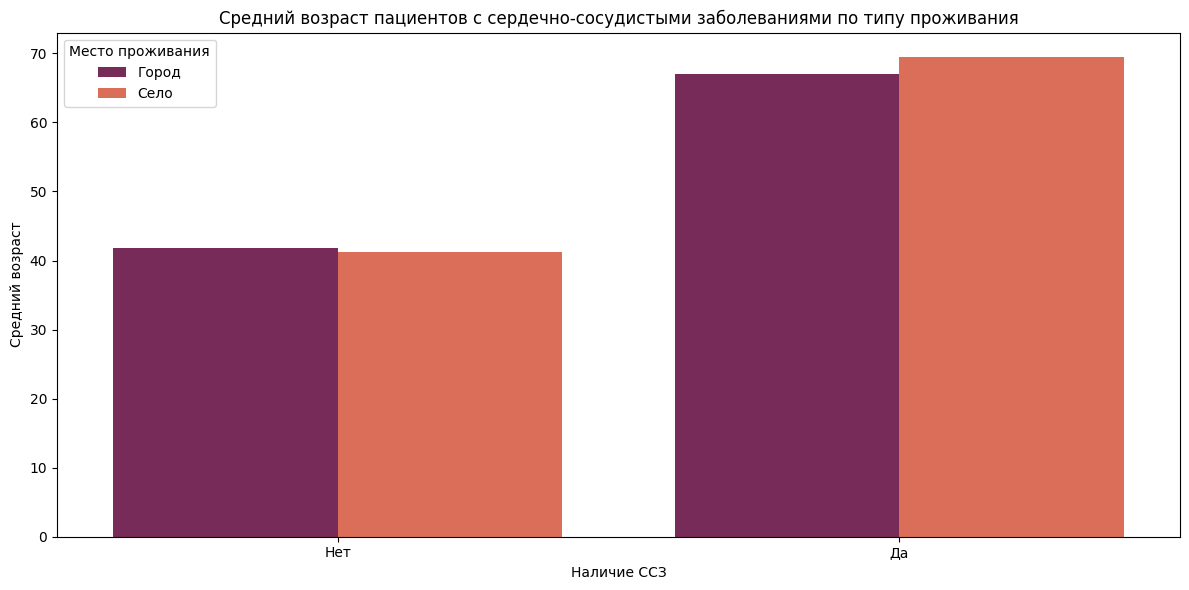

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df,
            x='heart_disease',
            y='age',
            hue='Residence_type',
            errorbar=None,
            palette = 'rocket')
plt.title('Средний возраст пациентов с сердечно-сосудистыми заболеваниями по типу проживания')
plt.xlabel('Наличие ССЗ')
plt.xticks([0, 1], ['Нет', 'Да'])
plt.ylabel('Средний возраст')
plt.legend(title='Место проживания',
           labels = ['Город', 'Село'])
plt.tight_layout()
plt.show()

## Круговые диаграммы

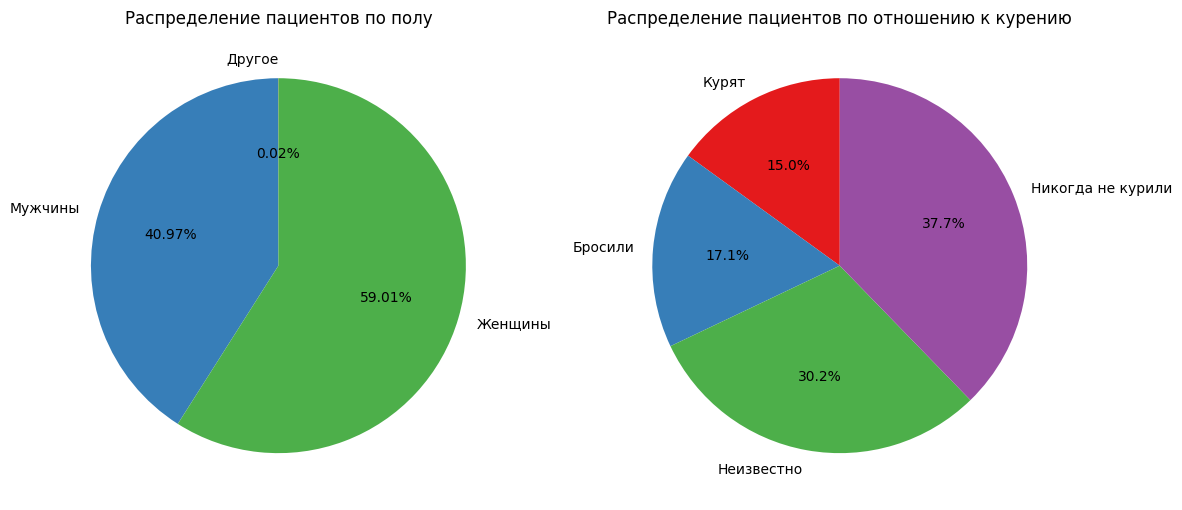

In [ ]:
fig = plt.figure(figsize=(12, 6))

plt_gender = fig.add_subplot(121)
gender_values = df.gender.value_counts().sort_values()
plt_gender.pie(gender_values,
               labels=['Другое', 'Мужчины', 'Женщины'],
               autopct='%1.2f%%',
               startangle=90,
               colors=colors)
plt_gender.set_title('Распределение пациентов по полу')

plt_smoking = fig.add_subplot(122)
smoking_values = df.smoking_status.value_counts().sort_values()
plt_smoking.pie(smoking_values,
                labels=['Курят', 'Бросили', 'Неизвестно', 'Никогда не курили'],
                autopct='%1.1f%%',
                startangle=90,
                colors=colors)
plt_smoking.set_title('Распределение пациентов по отношению к курению')

plt.tight_layout()
plt.show()

## Скрипичная диаграмма

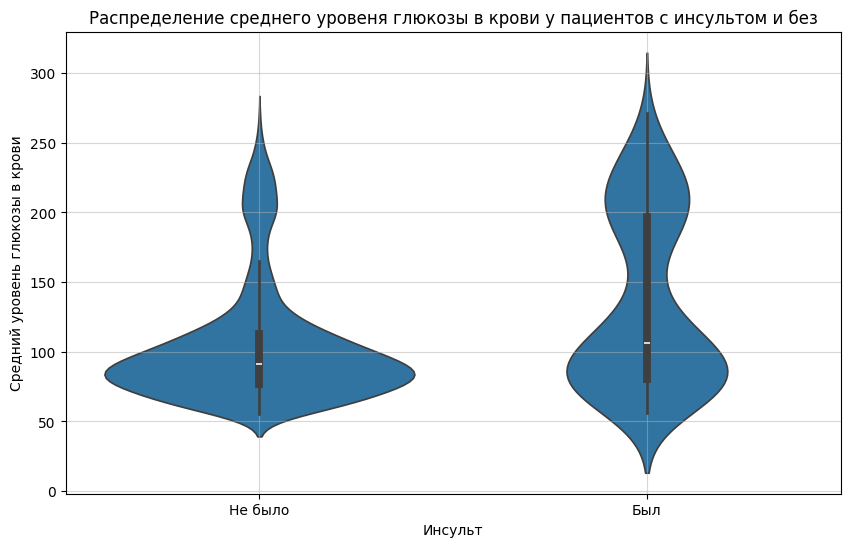

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df,
               x='stroke',
               y='avg_glucose_level')
plt.title('Распределение среднего уровеня глюкозы в крови у пациентов с инсультом и без')
plt.xlabel('Инсульт')
plt.ylabel('Средний уровень глюкозы в крови')
plt.xticks([0, 1], ['Не было', 'Был'])
plt.grid(True, alpha=0.5)
plt.show()

## Тепловая карта

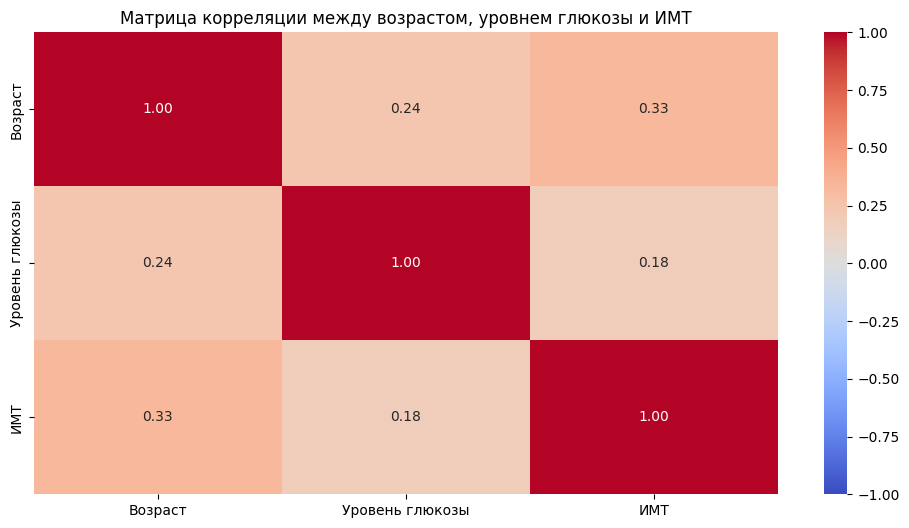

In [ ]:
matrix_corr = df[num].corr()

plt.figure(figsize=(12, 6))

num_ru_labels = ['Возраст', 'Уровень глюкозы', 'ИМТ']
sns.heatmap(matrix_corr,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            vmin= -1,
            vmax= 1,
            xticklabels=num_ru_labels,
            yticklabels=num_ru_labels)
plt.title('Матрица корреляции между возрастом, уровнем глюкозы и ИМТ')
plt.show()

## Сводная диаграмма

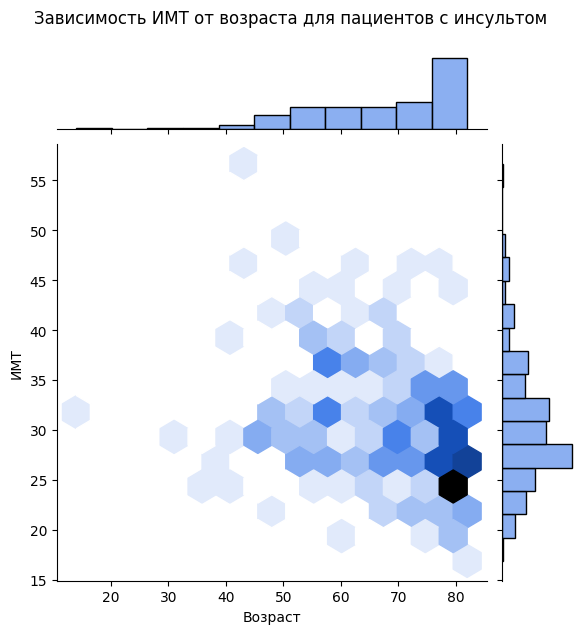

In [ ]:
sns.jointplot(stroke_data,
              x='age',
              y='bmi',
              kind='hex',
              color='cornflowerblue')
plt.suptitle('Зависимость ИМТ от возраста для пациентов с инсультом', y = 1.05)
plt.xlabel('Возраст')
plt.ylabel('ИМТ')
plt.show()

## Гистограммы

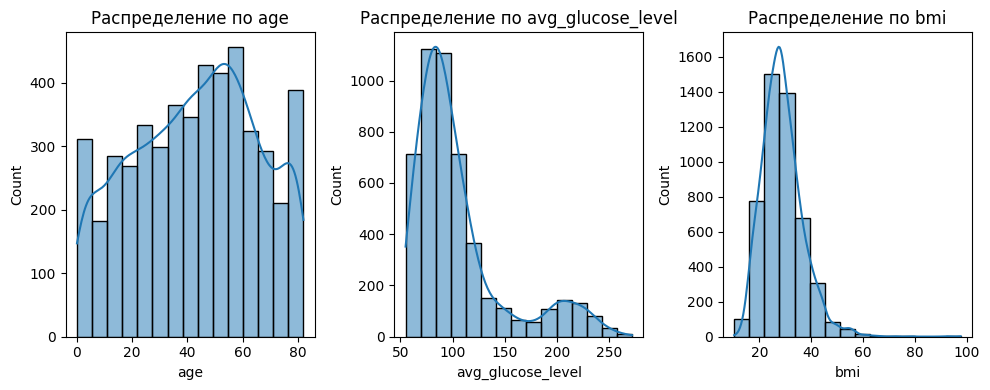

In [ ]:
plt.figure(figsize=(10, 4))
for i, col in enumerate(num, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col],
                  kde=True,
                  bins=15)
    plt.title('Распределение по ' + col)
    plt.tight_layout()

plt.show()